In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('../plate.jpg')

In [3]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

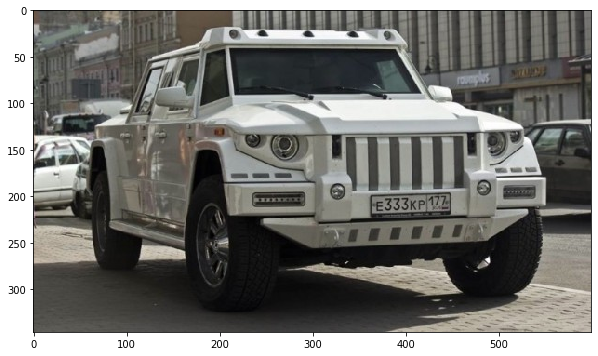

In [4]:
display(img)

In [5]:
plate_casc = cv2.CascadeClassifier('../haarcascades/haarcascade_russian_plate_number.xml')

In [17]:
def detect_plate(img):
      
    plate_img = img.copy()
  
    plate_rects = plate_casc.detectMultiScale(plate_img,scaleFactor=1.7, minNeighbors=2) # You can play arround with Scale and Neighbors#
    
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255), 4) 
        
    return plate_img

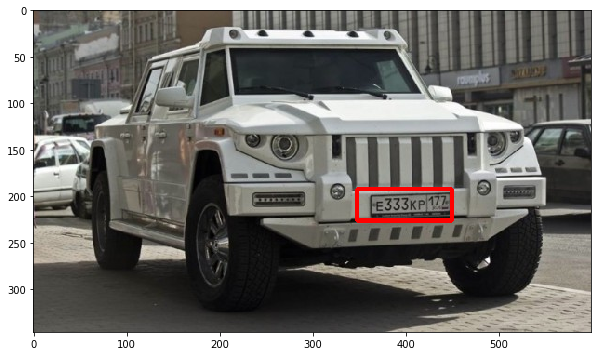

In [18]:
result = detect_plate(img)
display(result)

In [19]:
def detect_and_blur_plate(img):
    
    plate_img = img.copy()
    roi = img.copy()
  
    plate_rects = plate_casc.detectMultiScale(plate_img,scaleFactor=1.7, minNeighbors=2)
    
    for (x,y,w,h) in plate_rects: 
        
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img

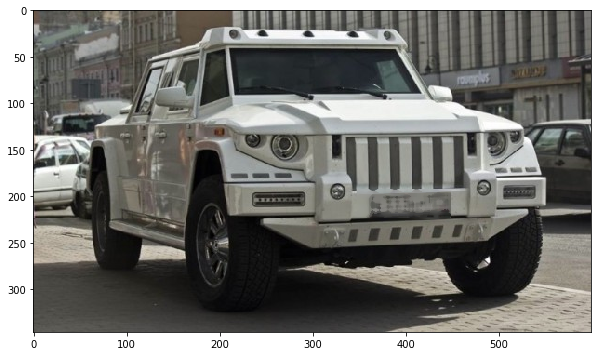

In [20]:
result = detect_and_blur_plate(img)
display(result)